In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/sample_data/carprices.csv')

In [ ]:
data.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [ ]:
data_one_hot = pd.get_dummies(data)
data_one_hot = data_one_hot.astype('float32')
data_one_hot.head()

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000.0,18000.0,6.0,0.0,1.0,0.0
1,35000.0,34000.0,3.0,0.0,1.0,0.0
2,57000.0,26100.0,5.0,0.0,1.0,0.0
3,22500.0,40000.0,2.0,0.0,1.0,0.0
4,46000.0,31500.0,4.0,0.0,1.0,0.0


In [ ]:
x = data_one_hot.drop('Sell Price($)', axis=1)
y = data_one_hot['Sell Price($)']

In [ ]:
x.head()

,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000.0,6.0,0.0,1.0,0.0
1,35000.0,3.0,0.0,1.0,0.0
2,57000.0,5.0,0.0,1.0,0.0
3,22500.0,2.0,0.0,1.0,0.0
4,46000.0,4.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=10)

In [ ]:
#creating model

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(50, activation= tf.keras.activations.leaky_relu),
    tf.keras.layers.Dense(100, activation= tf.keras.activations.leaky_relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.leaky_relu)
])

In [ ]:
model.compile( loss = tf.keras.losses.MeanAbsolutePercentageError(),
              optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0001)
              )

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 46.3764 - val_loss: 29.4907
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 46.3758 - val_loss: 29.5320
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 46.3721 - val_loss: 29.6050
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 46.3655 - val_loss: 29.7070
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 46.3562 - val_loss: 29.8354
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 46.3446 - val_loss: 29.9876
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 46.3397 - val_loss: 30.0466
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 46.3512 - val_loss: 30.0212
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 46.3462 - val_loss: 29.9192
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 46.3370 - val_loss: 29.8638
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 46.3420 - val_loss: 29.8507
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

In [ ]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 29.6072


29.607206344604492

In [ ]:
training_results = model.fit(X_train, y_train, epochs =100, verbose = 0, validation_data=(X_test, y_test))

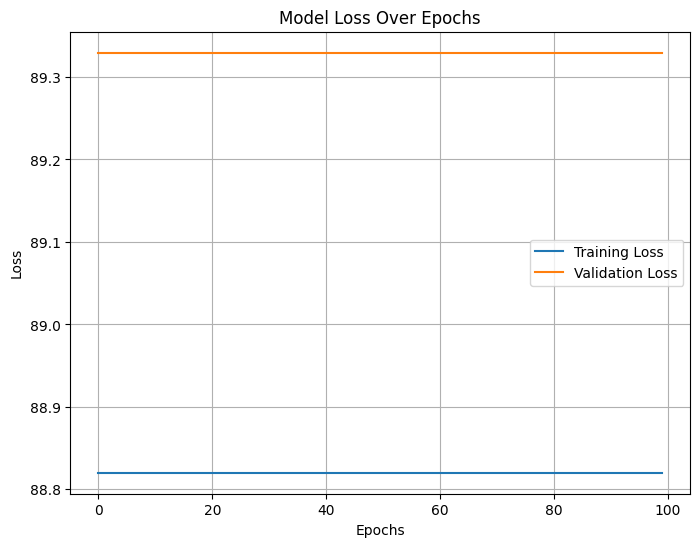

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(training_results.history['loss'], label='Training Loss')
plt.plot(training_results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()